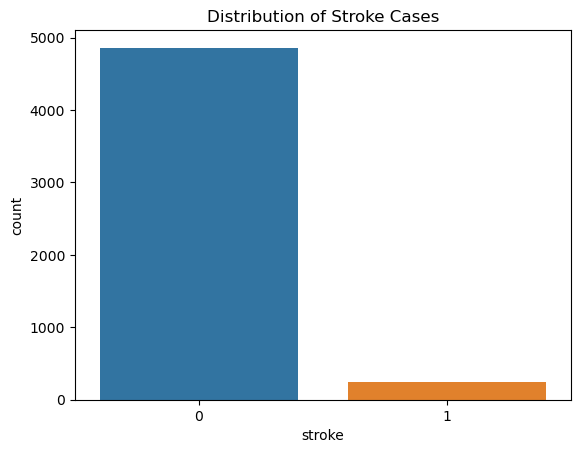

C:\Users\vidya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vidya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vidya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vidya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

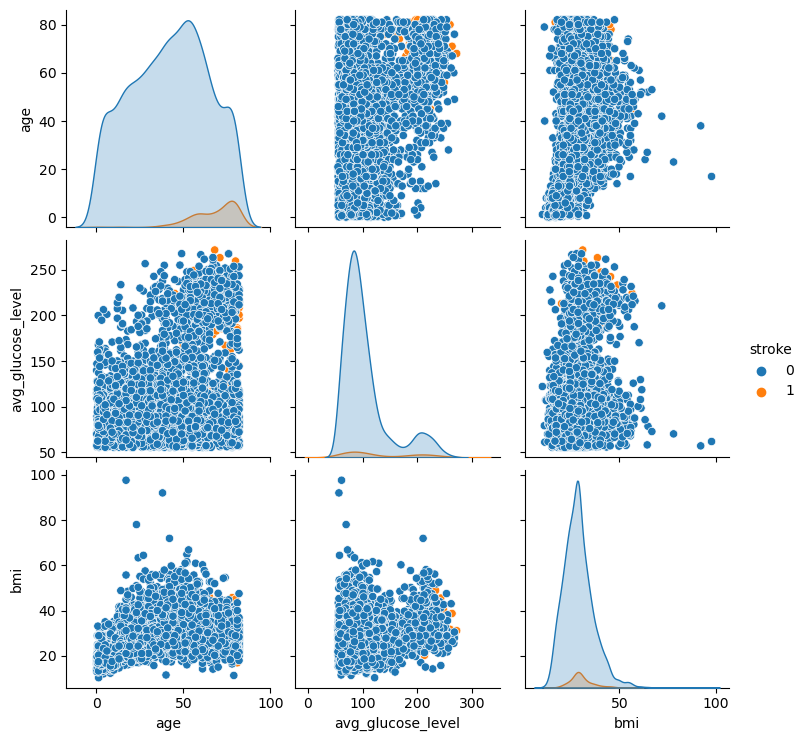

Confusion Matrix:
[[959   1]
 [ 62   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Accuracy Score:
0.9383561643835616
Predicted Stroke Risk: No
Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\vidya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vidya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}
Confusion Matrix (Best Model):
[[960   0]
 [ 62   0]]

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Accuracy Score (Best Model):
0.9393346379647749


C:\Users\vidya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vidya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vidya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['scaler.pkl']

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Step 1: Load the dataset
file_path = '..\\data\\raw\\healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Step 2: Data Preprocessing

# Handle missing values
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

# Encode categorical variables
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

# Drop irrelevant columns
data.drop(['id'], axis=1, inplace=True)

# Split the dataset into features and target variable
X = data.drop(['stroke'], axis=1)
y = data['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Exploratory Data Analysis (EDA)

# Visualize the distribution of the target variable
sns.countplot(x='stroke', data=data)
plt.title('Distribution of Stroke Cases')
plt.show()

# Pairplot for some features
sns.pairplot(data[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke')
plt.show()

# Step 4: Model Training and Evaluation

# Train a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Predict on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Step 5: Model Prediction

# Function to predict stroke risk
def predict_stroke(input_data):
    input_data_scaled = scaler.transform(np.array(input_data).reshape(1, -1))
    prediction = rfc.predict(input_data_scaled)
    return prediction[0]

# Example prediction
example_data = [67, 0, 1, 1, 0, 1, 1, 228.69, 36.6, 2]  # Example data point
print(f"Predicted Stroke Risk: {'Yes' if predict_stroke(example_data) else 'No'}")

# Step 6: Model Improvement (Hyperparameter Tuning)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_rfc = grid_search.best_estimator_

# Predict on the test set with the best estimator
y_pred_best = best_rfc.predict(X_test)

# Evaluate the best model
print("Confusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Best Model):")
print(accuracy_score(y_test, y_pred_best))

# Save the model
joblib.dump(best_rfc, 'stroke_prediction_model.pkl')
joblib.dump(scaler, 'scaler.pkl')



<lifelines.CoxPHFitter: fitted with 5110 total observations, 4861 right-censored observations>
             duration col = 'age'
                event col = 'stroke'
      baseline estimation = breslow
   number of observations = 5110
number of events observed = 249
   partial log-likelihood = -1592.00
         time fit was run = 2024-07-01 01:30:31 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
gender             0.13      1.14      0.13           -0.12            0.39                0.88                1.47
hypertension       0.15      1.16      0.15           -0.14            0.44                0.87                1.55
heart_disease     -0.03      0.97      0.17           -0.36            0.29                0.70                1.34
ever_married      -0.17      0.84      0.20           -0.56            0.22                0.57                1.25
work_type         -0.17      0.85      0.07           -0.29           -0.04                0.75                0.96
Residence_type    -0.01      0.99      0.13           -0.26            0.24                0.77                1.27
avg_glucose_level  0.00      1.00      0.00            0.00            0.00                1.00                1.00
bmi                0.03      1.03      0.01            0.01            0.05                1.01                1.05
smoking_status     0.05      1.05      0.07           -0.08            0.19                0.92                1.21

                   cmp to     z    p  -log2(p)
covariate                                     
gender               0.00  1.01 0.31      1.67
hypertension         0.00  1.03 0.30      1.72
heart_disease        0.00 -0.19 0.85      0.24
ever_married         0.00 -0.85 0.39      1.35
work_type            0.00 -2.53 0.01      6.46
Residence_type       0.00 -0.11 0.91      0.13
avg_glucose_level    0.00  2.11 0.04      4.84
bmi                  0.00  2.46 0.01      6.18
smoking_status       0.00  0.74 0.46      1.13
---
Concordance = 0.57
Partial AIC = 3202.00
log-likelihood ratio test = 23.99 on 9 df
-log2(p) of ll-ratio test = 7.85

<Axes: xlabel='log(HR) (95% CI)'>

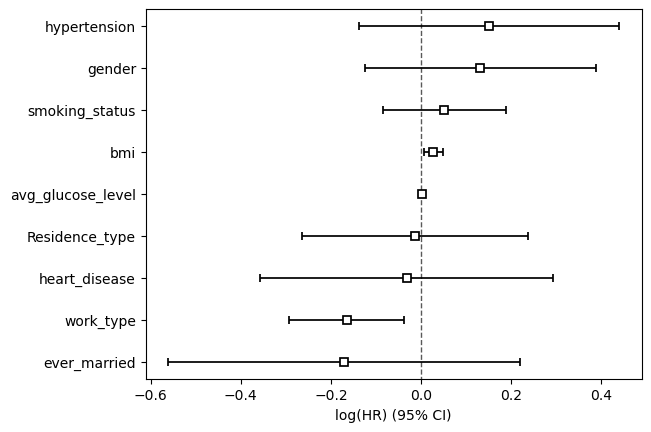

In [9]:

# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(data, duration_col='age', event_col='stroke')
cph.print_summary()

# Plot the survival functions
cph.plot()

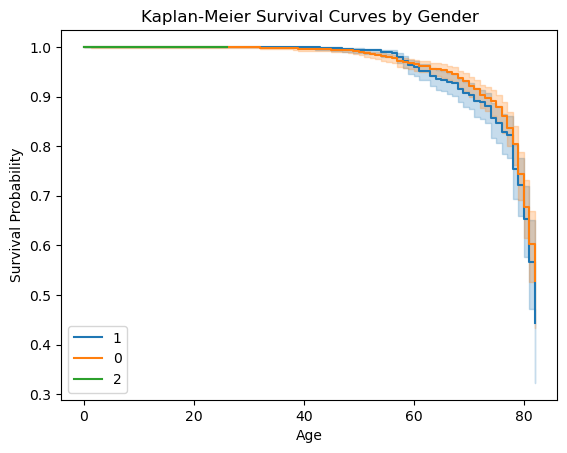

In [11]:
from lifelines import KaplanMeierFitter
# Fit the Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Example for gender groups
fig, ax = plt.subplots()
for gender in data['gender'].unique():
    mask = data['gender'] == gender
    kmf.fit(durations=data[mask]['age'], event_observed=data[mask]['stroke'], label=gender)
    kmf.plot_survival_function(ax=ax)

plt.title('Kaplan-Meier Survival Curves by Gender')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.show()